In [1]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
import torch
from sklearn.metrics.pairwise import cosine_similarity


model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', device=torch.device('mps'))

/Users/arminnoqteh/anaconda3/lib/python3.11/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [2]:
isna = pd.read_csv('../data/isna.csv', lineterminator= '\n')
isna_embeddings = np.load('isna_embeddings.npy')
political_unrest = model.encode("ناآرامی سیاسی")
isna['p_unrest_sim'] = cosine_similarity(isna_embeddings, political_unrest.reshape(1, -1)).flatten()

<Axes: xlabel='QuarterlyPeriods'>

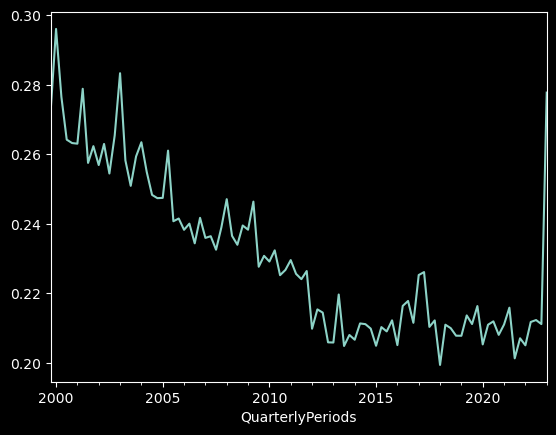

In [6]:
if not pd.api.types.is_datetime64_any_dtype(isna['time']):
    isna['time'] = pd.to_datetime(isna['time'])

isna['MonthlyPeriods'] = isna['time'].dt.to_period('M')
isna['QuarterlyPeriods'] = isna['time'].dt.to_period('Q')

# plot political unrest
isna.groupby('QuarterlyPeriods')['p_unrest_sim'].mean().plot()

In [7]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

isna['DailyPeriods'] = isna['time'].dt.to_period('D')
values = isna.groupby('DailyPeriods')['p_unrest_sim'].mean().values

# Define the ARIMA model
model = ARIMA(values, order=(1,0,0))

# Fit the model
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(isna), end=len(isna) + 10)

# Evaluate the model performance
mse = mean_squared_error(isna['p_unrest_sim'], model_fit.fittedvalues)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("Predictions:", predictions)


ValueError: Found input variables with inconsistent numbers of samples: [2057877, 3899]